In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('C:\\Users\\sean.deboo\\.spyder-py3\\train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [13]:
titanic = df[['Survived','Pclass','Sex','Age','Fare']]
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


<AxesSubplot:xlabel='Pclass'>

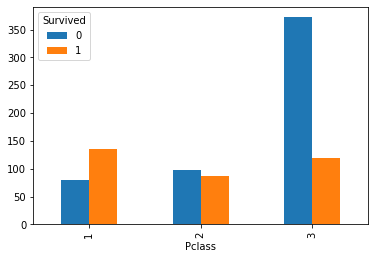

In [9]:
pd.crosstab(df.Pclass,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Embarked'>

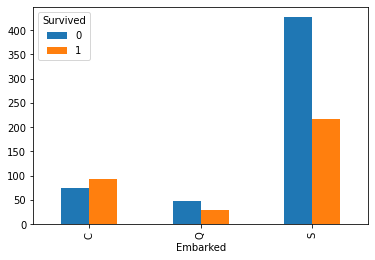

In [10]:
pd.crosstab(df.Embarked,df.Survived).plot(kind='bar')

<AxesSubplot:xlabel='Sex'>

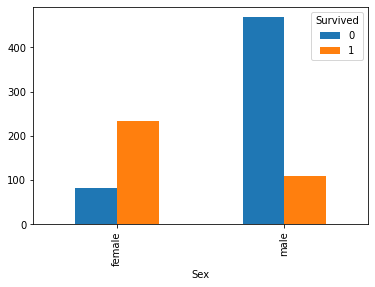

In [11]:
pd.crosstab(df.Sex,df.Survived).plot(kind='bar')

In [14]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [15]:
target = df.Survived
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [18]:
inputs = titanic.drop('Survived',axis='columns')
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [19]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})
inputs.head()

,Pclass,Sex,Age,Fare
0,3,1,22.0,7.2500
1,1,2,38.0,71.2833
2,3,2,26.0,7.9250
3,1,2,35.0,53.1000
4,3,1,35.0,8.0500


In [22]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [24]:
from sklearn.model_selection import train_test_split


In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)


In [26]:
len(X_train)

712

In [27]:
len(X_test)

179

In [28]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [29]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
model.score(X_test,y_test)

0.8100558659217877